In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data1a = np.load('part1a.npz')

In [63]:
N = data1a['N'].sum()
S_0 = data1a['Svc_0_pmf'].flatten()*(N.reshape(1)[0]).flatten()
I_c0 = data1a['Ic_0']
R_0 = np.array([0])
t = np.linspace(0,120,120)

initial_vec = np.concatenate([S_0,I_c0,R_0])
betas = np.linspace(0.01,1,16).reshape(4,4)
gamma = data1a['gamma'].reshape(1)[0]
print(initial_vec)

[10953.30923225  3300.77595232  8179.04434919 11593.99375796
  3089.75210416  8511.99369833  4528.76409871  5718.28254294
  7471.46489455  2495.64258153 10236.59890526  4256.69555713
  1605.86349244  8109.60840208  9158.21154258   789.99888857
    47.            90.            51.            65.
     0.        ]


In [5]:
#solution

def SIR_model(t, Y, betas, gamma):
    S_vector=Y[:16].reshape(4,4)
    I_vector=Y[16:20]
    R=Y[20]
    
    # (-(-(np.sum(betas, axis = 1)*np.sum(S_vector, axis = 1)*np.sum(I_vector)))
    
    dSvc_dt= (-(betas*S_vector*np.sum(I_vector))/N)
    dIc_dt= (-np.sum(dSvc_dt, axis = 1) - gamma*I_vector).flatten()
    dR_dt= gamma*np.sum(I_vector).flatten()
    
    RHS_vector= np.concatenate([dSvc_dt.flatten(), dIc_dt, dR_dt])

    return RHS_vector

In [6]:
from scipy.integrate import solve_ivp

soln_obj = solve_ivp(SIR_model, (t[0],t[-1]), initial_vec, 
                     args = (betas, gamma), dense_output = True)

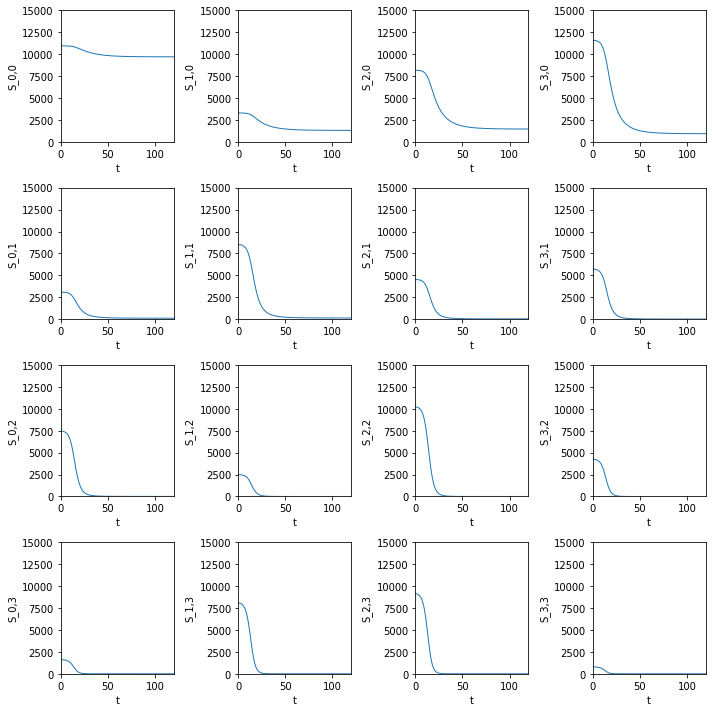

In [7]:
# S_v,c's
plt.figure(figsize=(10,10))

for i in range(0,16):
    
    plt.subplot(4,4, i+1)
    plt.xlim(0, 120)
    plt.ylim(0, 15000)
    plt.plot(t, soln_obj.sol(t)[i], linewidth=1)
    plt.xlabel("t")
    plt.ylabel(f'S_{i%4},{i//4}').set_rotation(90)
    

plt.tight_layout()
plt.show()


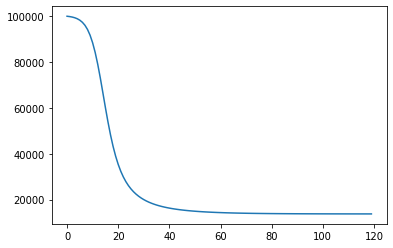

In [8]:
plt.plot(soln_obj.sol(t)[:16].sum(axis=0))

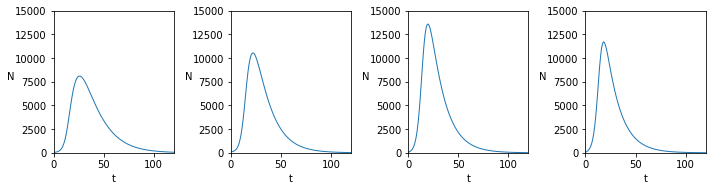

In [9]:
#I_t's

plt.figure(figsize=(10,10))

for i in range(0,4):
    
    plt.subplot(4,4, i+1)
    plt.xlim(0, 120)
    plt.ylim(0, 15000)
    plt.plot(t, soln_obj.sol(t)[i + 16], linewidth=1)
    plt.xlabel("t")
    plt.ylabel("N").set_rotation(0)
    
plt.tight_layout()
plt.show()

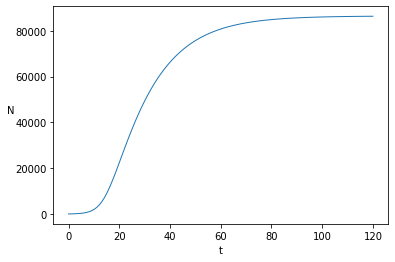

In [10]:
# R
plt.plot(t, soln_obj.sol(t)[-1], linewidth=1)
plt.xlabel("t")
plt.ylabel("N").set_rotation(0)

In [11]:
soln_obj.sol(t[-1])[0:16]/S_0

array([8.86075710e-01, 3.98828939e-01, 1.79523532e-01, 8.08131924e-02,
       3.63812821e-02, 1.63801919e-02, 7.37595557e-03, 3.32195666e-03,
       1.49648896e-03, 6.74375748e-04, 3.04056981e-04, 1.37201925e-04,
       6.19910794e-05, 2.80675789e-05, 1.27505553e-05, 5.82281277e-06])

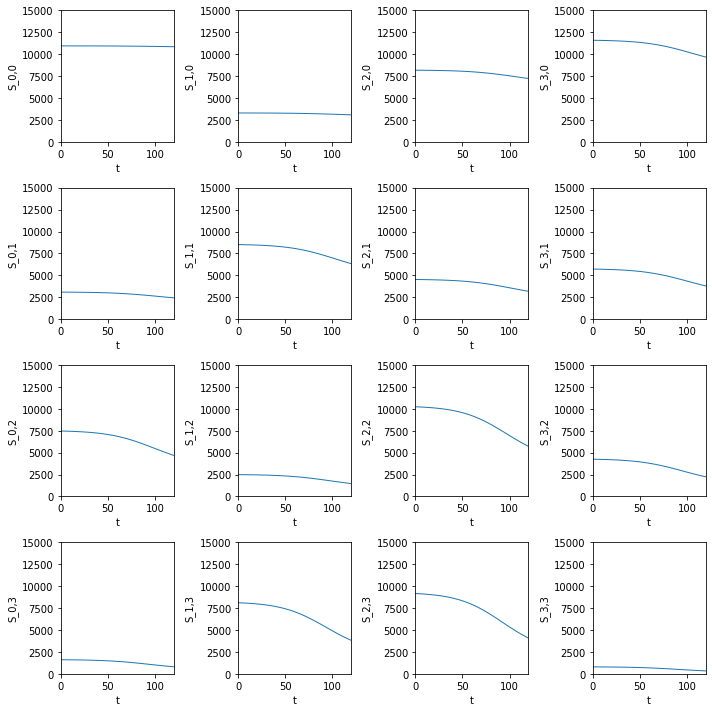

In [12]:
betas = (np.linspace(0.01,1,16).reshape(4,4))*.25

from scipy.integrate import solve_ivp

soln_obj = solve_ivp(SIR_model, (t[0],t[-1]), initial_vec, 
                     args = (betas, gamma), dense_output = True)

# S_v,c's
plt.figure(figsize=(10,10))

for i in range(0,16):
    
    plt.subplot(4,4, i+1)
    plt.xlim(0, 120)
    plt.ylim(0, 15000)
    plt.plot(t, soln_obj.sol(t)[i], linewidth=1)
    plt.xlabel("t")
    plt.ylabel(f'S_{i%4},{i//4}').set_rotation(90)
    

plt.tight_layout()
plt.show()


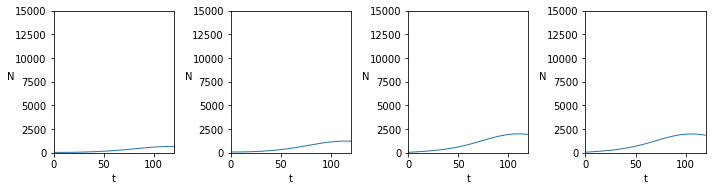

In [13]:

plt.figure(figsize=(10,10))

for i in range(0,4):
    
    plt.subplot(4,4, i+1)
    plt.xlim(0, 120)
    plt.ylim(0, 15000)
    plt.plot(t, soln_obj.sol(t)[i + 16], linewidth=1)
    plt.xlabel("t")
    plt.ylabel("N").set_rotation(0)
    
plt.tight_layout()
plt.show()

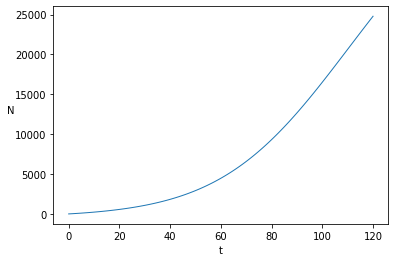

In [14]:
# R
plt.plot(t, soln_obj.sol(t)[-1], linewidth=1)
plt.xlabel("t")
plt.ylabel("N").set_rotation(0)

## 1b

In [118]:
data1b = np.load('part1b.npz')

In [185]:
## repeat this process four more times changing the values in S_0 according to the PMF of comorbodity
## can't figure out the correct MSE value. Someone please figure it out. Everything else is right

from sklearn.metrics import mean_squared_error
from scipy import integrate
from itertools import product
import matplotlib.pyplot as plt
import matplotlib as mpl

# this is the grid we will search
beta_grid=np.linspace(0,1,12)
P0_grid=np.arange(0,16)
t = np.linspace(0,20,20)
S_0 = np.array([N*.5,N*.3,N*.1,N*.1])
gamma = data1b['gamma'].reshape(1)[0]

def SIR_model(t, Y, betas, gamma):
    S_vector=Y[:4].reshape(1,4)
    I_vector=Y[4:8]
    R=Y[8]
    
    # (-(-(np.sum(betas, axis = 1)*np.sum(S_vector, axis = 1)*np.sum(I_vector)))
    
    dSvc_dt= (-(betas*S_vector*np.sum(I_vector))/N)
    dIc_dt= (-np.sum(dSvc_dt, axis = 1) - gamma*I_vector).flatten()
    dR_dt= gamma*np.sum(I_vector).flatten()
    
    RHS_vector= np.concatenate([dSvc_dt.flatten(), dIc_dt, dR_dt])

    return RHS_vector

for i in range(5):
    initial_vec = np.vstack([initial_vec,np.concatenate([S_0,data1b['Ic_0'][i].flatten(),R_0])])

observed_data = data1b['L_validation']


mmse=np.inf
r_mmse=np.nan
K_mmse=np.nan
P0_mmse=np.nan

# we don't need to include P0_grid in the for loop,
# solve_ivp can be run for different P0 values at once
for (beta_01,beta_02,beta_03,beta_04) in product(beta_grid, beta_grid, beta_grid, beta_grid):
    if(beta_01>=beta_02 or beta_02>=beta_03 or beta_03>=beta_04):
        continue
    mse = 0
    for i in range(5):
        soln_obj=integrate.solve_ivp(SIR_model, (t[0],t[-1]), initial_vec[i], \
                                        
                                     args = (np.array([beta_01,beta_02,beta_03,beta_04]), gamma),\
                                     dense_output=True)
        solutions = soln_obj.sol(t)
        '''
        check the value below I'm not sure how to calculate it
        ''' 
        mse += ((observed_data[i]-(data1b['Lc'].reshape(-1,4)@solutions[4:8]))**2).sum()
    if(mse<mmse):
        mmse = mse
        mbeta_01 = beta_01
        mbeta_02 = beta_02
        mbeta_03 = beta_03
        mbeta_04 = beta_04
    # this gets the minimum MSE over all grid points


In [186]:
# print out beta estimations vs beta validation        
print(f"Estimated values for Beta: beta_01: {mbeta_01}, beta_02: {mbeta_02}, beta_03: {mbeta_03}, beta_04: {mbeta_04}")
print(f"MMSE estimate: {mmse}")


Estimated values for Beta: beta_01: 0.0, beta_02: 0.07142857142857142, beta_03: 0.14285714285714285, beta_04: 0.21428571428571427
MMSE estimate: 117706446.72960609


In [133]:
data1b['Lc']

array([0.3, 0.4, 0.7, 1. ])

In [188]:
print(observed_data[1])
print(sum(data1b['L_validation'][1]**2+data1b['L_validation'][2]**2+data1b['L_validation'][3]**2+data1b['L_validation'][4]**2))
print(data1b['Lc'])
print(data1b['Lc'].reshape(-1,4)@solutions[4:8])
((observed_data[i]-(data1b['Lc'].reshape(-1,4)@solutions[4:8]))**2).sum()

[168.20103748 175.31698233 184.41546073 191.23318015 200.38958258
 212.84378649 222.09570163 237.44506788 251.13497681 263.20329764
 281.12505942 299.02683147 312.07088043 336.08191882 353.17466265
 372.3214408  404.21116271 424.09816716 450.52039605 482.72819186]
4584999.608084423
[0.3 0.4 0.7 1. ]
[[1.20000000e+02 3.81412400e+03 8.09851941e+04 2.11205332e+05
  2.09044234e+05 1.94503421e+05 1.80448768e+05 1.67381029e+05
  1.55257671e+05 1.44012241e+05 1.33581309e+05 1.23905897e+05
  1.14931284e+05 1.06606709e+05 9.88850887e+04 9.17227562e+04
  8.50791807e+04 7.89168251e+04 7.32008212e+04 6.78988209e+04]]


336731392917.7632

In [ ]:
func = lambda t,P : r_mmse*P*(1-P/K_mmse)
# solve one last time with MMSE estimated parameters to plot
soln_obj = integrate.solve_ivp(func, [t[0],t[-1]], [P0_mmse], dense_output=True)

#copy and paste same thing and use L_test for 20 days problem 2
mpl.style.use('default')
plt.figure(figsize=(5,5))
plt.plot(t, soln_obj.sol(t).squeeze(), linewidth=1, label="MMSE estimated trajectory")
plt.plot(t[::10], observed_data, 'o', label="Observed data points")
plt.xlabel("t")
plt.ylabel("P").set_rotation(0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()